# Visualizing a vector of data.

Load data from a csv data file, and visualize it's distribution. 

ISE 201 Fall 24     JMA     3 Oct 2024

In [50]:
# Typical imports for data science notebook
# Not all will be used here

# Imports from the python standard library
import math, re, os, sys 
from pathlib import Path

# Import array and dataframe packages
import numpy as np
import numpy.linalg as la
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats


In [51]:
# Find the data file
DATA_DIR = '../data'
os.chdir(DATA_DIR)
os.listdir('.')

['emnist-digits-test.csv']

In [52]:
# Load one EMNIST data file


emnist__digits = pd.read_csv('emnist-digits-test.csv', header=None, sep=',', dtype= 'uint')
print(emnist__digits.shape)
emnist__digits
# emnist__digits.head()

(40000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39996,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39997,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39998,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Select the first column from a pandas dataframe, and convert it to a numpy vector

def extract_image_vector(index, dataset=emnist__digits):
    'Return a vector from a row in the Pandas DataFrame.'
    return emnist__digits.values[index,1:]

digit_one = extract_image_vector(1)
digit_one.shape
# digit_one

(784,)

In [54]:
# Inspect the vector's range of values and their counts
# print(digit_one)
unique_values, value_counts = np.unique(digit_one, return_counts=True)
unique_values, value_counts

(array([  0,   1,   2,   3,   4,   5,   7,   8,   9,  10,  11,  18,  20,
         21,  22,  25,  32,  34,  36,  37,  39,  40,  46,  47,  50,  51,
         64,  67,  69,  79,  82,  83,  95, 100, 113, 114, 116, 122, 127,
        128, 132, 139, 140, 141, 142, 169, 170, 172, 175, 178, 184, 186,
        189, 207, 208, 209, 213, 214, 216, 219, 220, 221, 227, 230, 231,
        232, 233, 234, 237, 244, 245, 246, 247, 248, 249, 250, 251, 252,
        253, 254, 255], dtype=uint64),
 array([616,   5,   3,   2,   2,   4,   4,   3,   3,   1,   1,   1,   3,
          3,   2,   1,   4,   2,   1,   8,   3,   1,   1,   2,   3,   3,
          1,   1,   1,   1,   2,   1,   3,   1,   1,   1,   1,   2,   1,
          2,   1,   4,   1,   1,   1,   1,   1,   1,   4,   1,   1,   1,
          1,   3,   1,   2,   2,   2,   1,   1,   4,   2,   1,   1,   2,
          5,   1,   2,   1,   3,   2,   2,   2,   1,   2,   7,   2,   6,
          3,   2,   1]))

(array([654.,  25.,   6.,   8.,   6.,  10.,   8.,   3.,  19.,  45.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

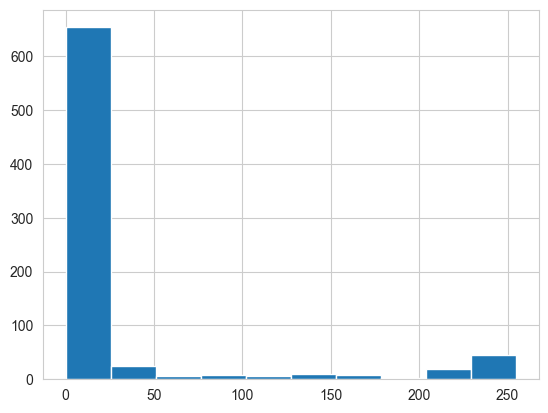

In [55]:
# Visualize it's histogram using matplot library
# Matplotlib is a work-alike to MatLab's plotting functions
plt.hist(digit_one)


# The x-axis will represent the pixel intensity values (ranging from 0 to 255 if it's grayscale data).
# The y-axis will represent the count of pixels for each intensity range.



<Axes: ylabel='Count'>

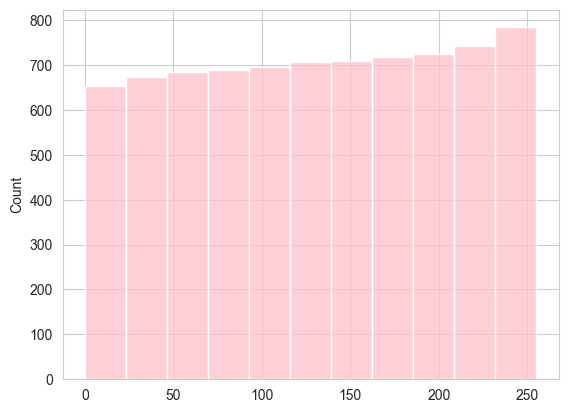

In [56]:
# The seaborn library extends matplot lib, for to visualize different statistical properties. 
sns.histplot(digit_one, cumulative=True, color='pink')

[ 20  37  37  37  37   5   7  32  32  18  40 207 231 213 231 245  50   7
  37  51 175 244 213   4  20 175 247 220  67   7 116 245 139  21  50 175
 249 250 249 232 122   2   8 122 246 221  79   3  50 220 208   8   5  34
 170 220 252 251 232 128  82   8   1  95 232 207  47  10 142 221   9   4
  47 214 234 254 250 175  51  32  22 219 250  95   7  21 172 214  39 113
 178 253 252 209 139  34 114 253 209   9  39 216 186 233 253 244 139  82
   9 140 250 139   5 100 234 252 252 232 127  11   2   3 184 227  64   1
  20  37  51 132 250 255 232  95  22   2 169 252 189 141 220 250 251 254
 246 207  36  83 248 247 230 237 252 250 244 128  46   1   5  37  37  21
  25  69  39  32   1   1]
37


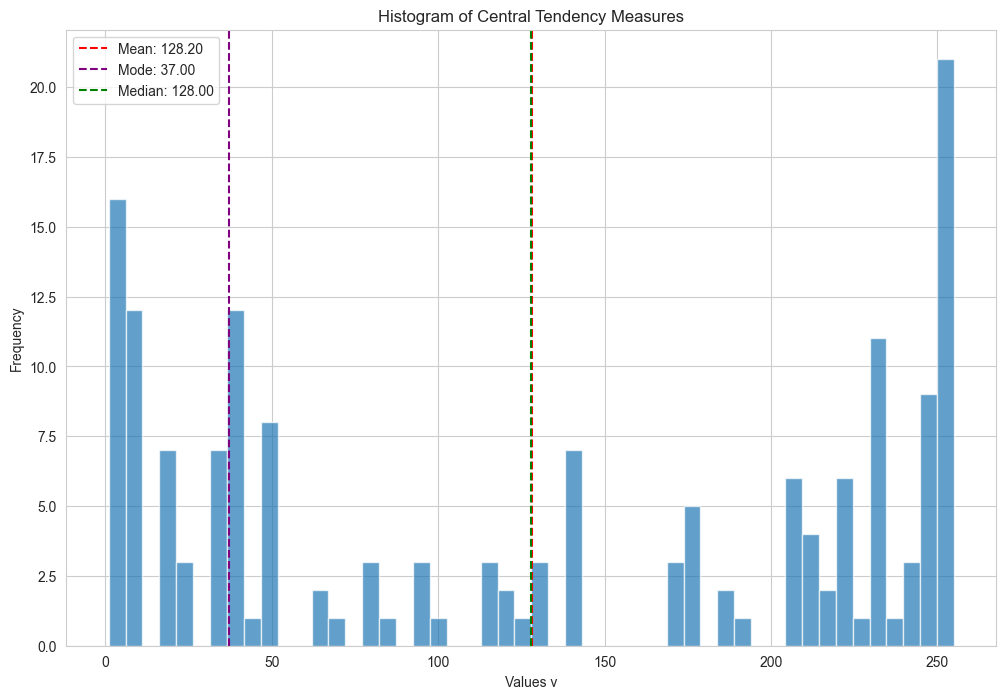

In [113]:
# Since 0 is the most common value, let's remove it and look at the distribution of non-zero values
non_zero_digit_values = digit_one[ digit_one > 0]
print(non_zero_digit_values)


############  My Codes:

# calculate measures of central tendency for P(V)
mean = np.mean(non_zero_digit_values)
median = np.median(non_zero_digit_values)

# return an array with first e and second e:
# The first element is an array containing the mode(s) of the data.
# The second element is an array containing the count(s) of the mode(s).
mode = stats.mode(non_zero_digit_values)[0]
print(mode)

plt.figure(figsize=(12, 8))
plt.hist(non_zero_digit_values, bins=50, alpha=0.7)

# Plotting the mean, median, and mode
plt.axvline(mean, color='red', linestyle='dashed', label=f'Mean: {mean:.2f}')
plt.axvline(mode, color='purple', linestyle='dashed', label=f'Mode: {mode:.2f}')
plt.axvline(median, color='green', linestyle='dashed', label=f'Median: {median:.2f}')

# Add titles and labels
plt.title('Histogram of Central Tendency Measures')
plt.xlabel('Values v')
plt.ylabel('Frequency')
plt.legend()

plt.show()


## Assignment: Visualize the distribution of the data's non-zero values. 

Fix the histogram displays to just show those values. You can re-use any of the code in this notebook, but remove the code that you don't use. 

Specifically show the "measures of central tendency" ; the mean, mode and median of $ P(v | v > 0) $.  
- Compare these measures of central tendency with the full data distribution $ P(v) $.
- Make the measures clear in your diagrams. You can be creative.  

Turn in both the ".ipynb" file after testing that it runs to completion, and an ".html" version.

To create an html version of your notebook run

`$ jupyter nbconvert --to=html <your_notebook>.ipynb`